## Data-Cleaning-sentimental-Analysis

importing necessay libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [27]:
import missingno as msno

creating dataframe

In [28]:
from tqdm import tqdm

### Data preprocessing

In [29]:
train_df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
train_df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


<Axes: >

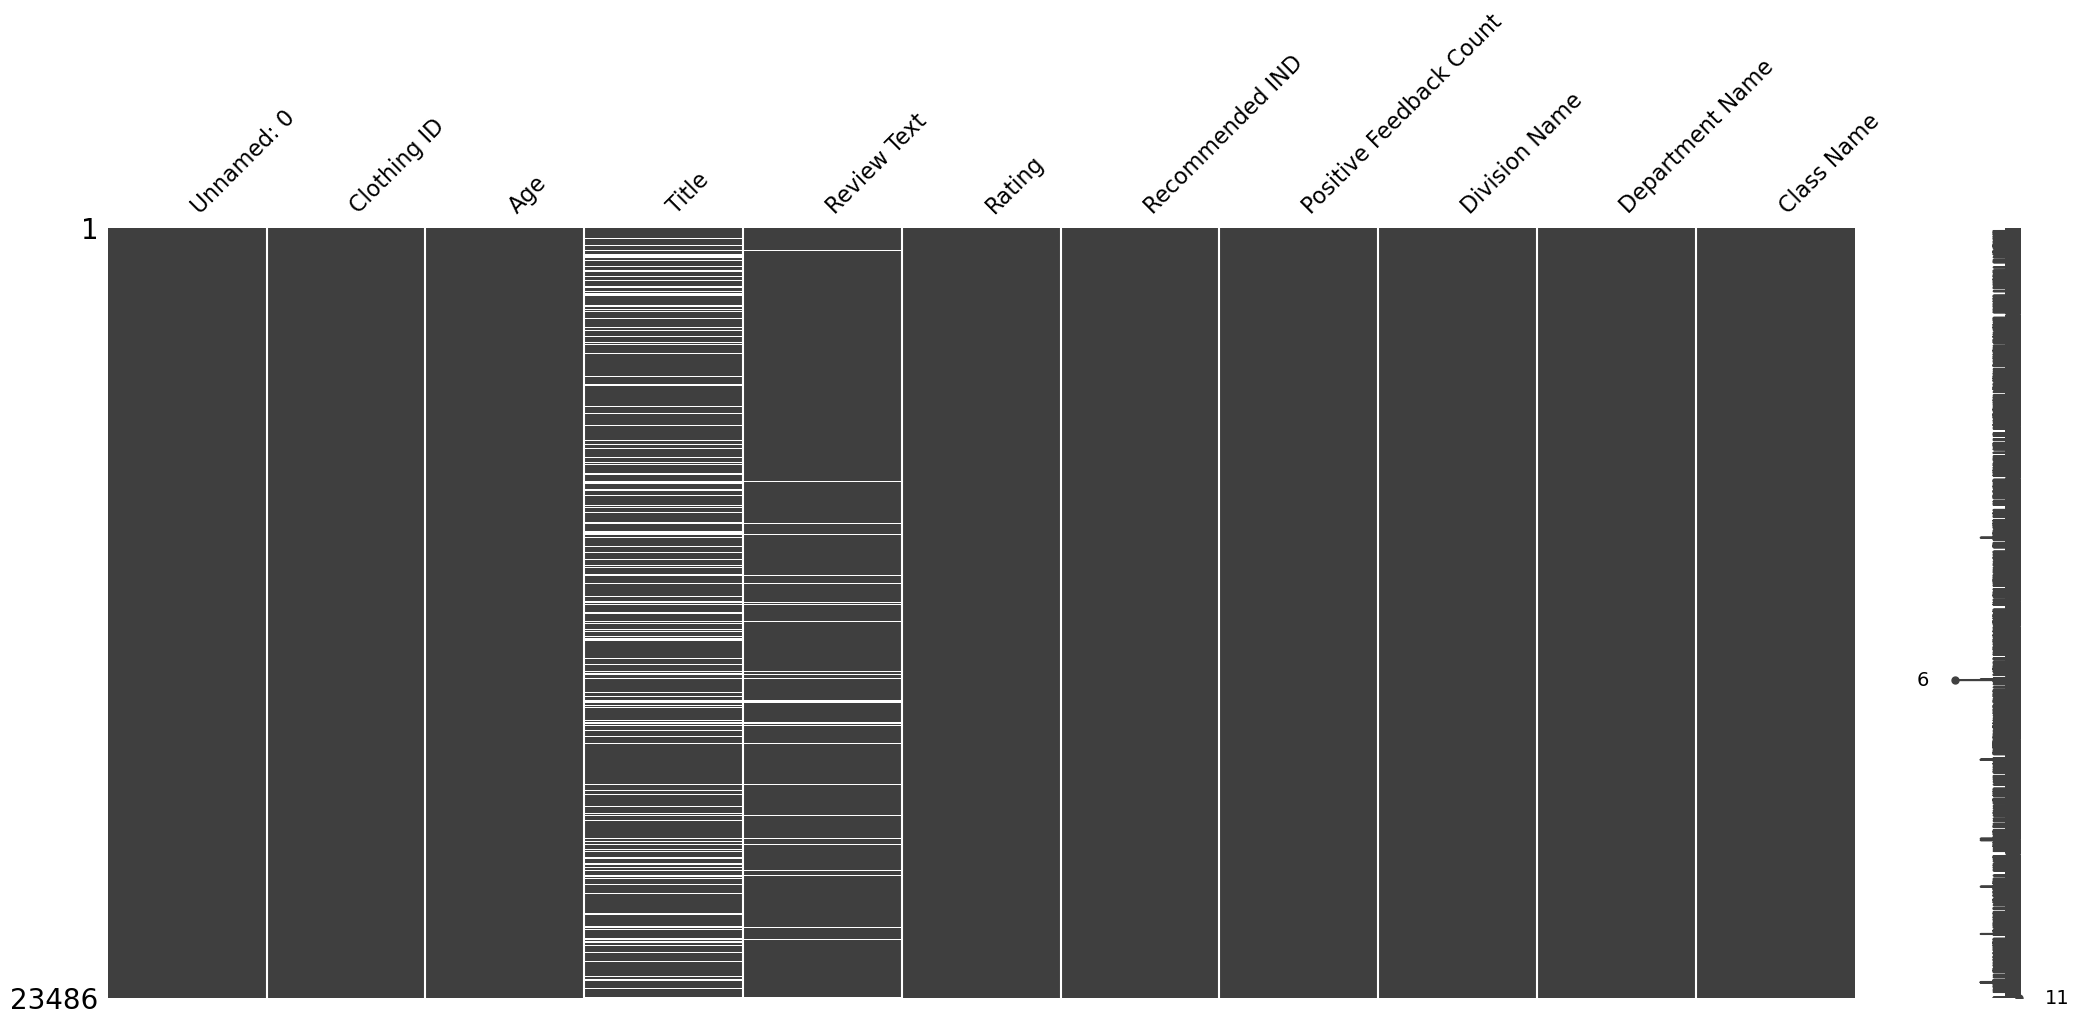

In [30]:
msno.matrix(train_df)

In [34]:
train_df.drop(columns=['Unnamed: 0', 'Clothing ID'], inplace= True)

c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Age'>

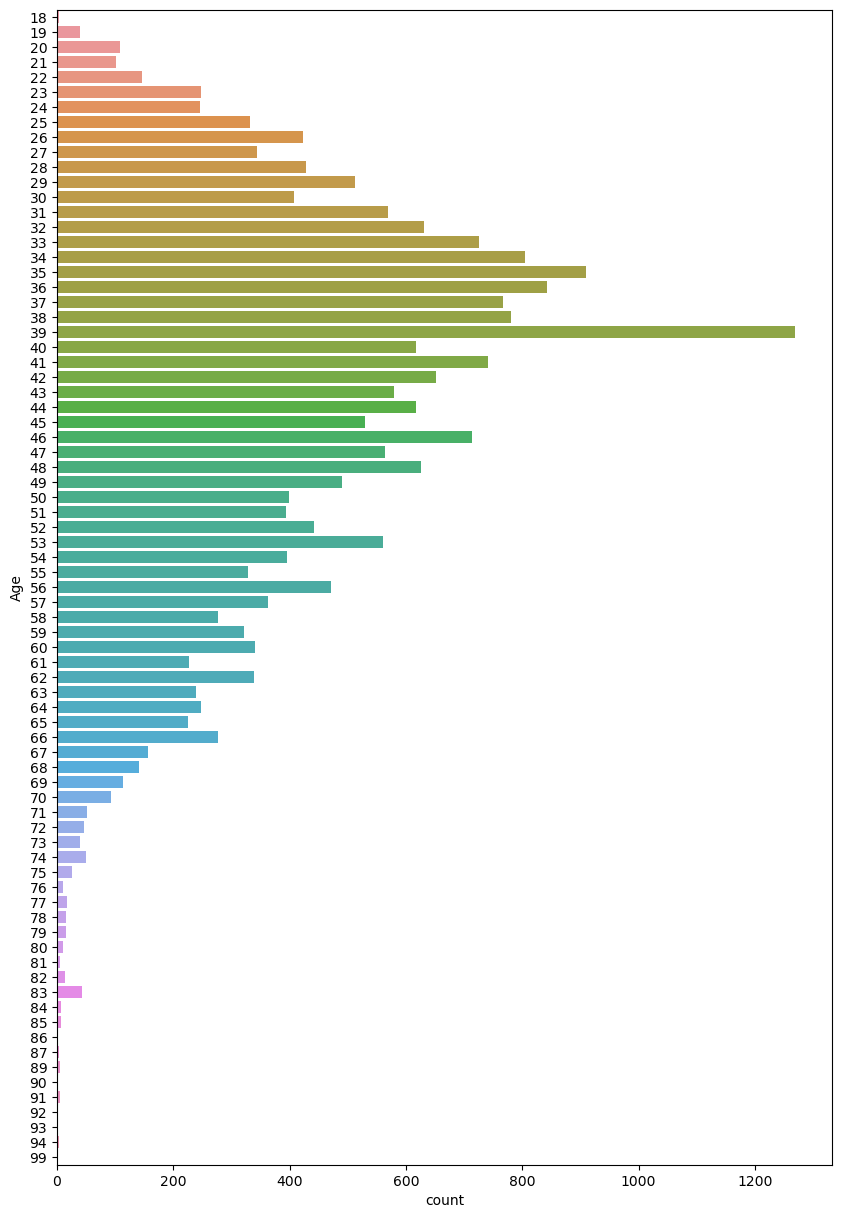

In [36]:
plt.figure(figsize= (10, 15))
sns.countplot(y = train_df.Age)

In [37]:
train_df.Age.value_counts()[:10]

Age
39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
Name: count, dtype: int64

### Feature Engineering

In [38]:
train_df.Title.replace(to_replace=np.NaN, value='', inplace=True)

In [39]:
train_df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [41]:
train_df['Review Text'].replace(to_replace=np.NaN, value='', inplace=True)

<Axes: >

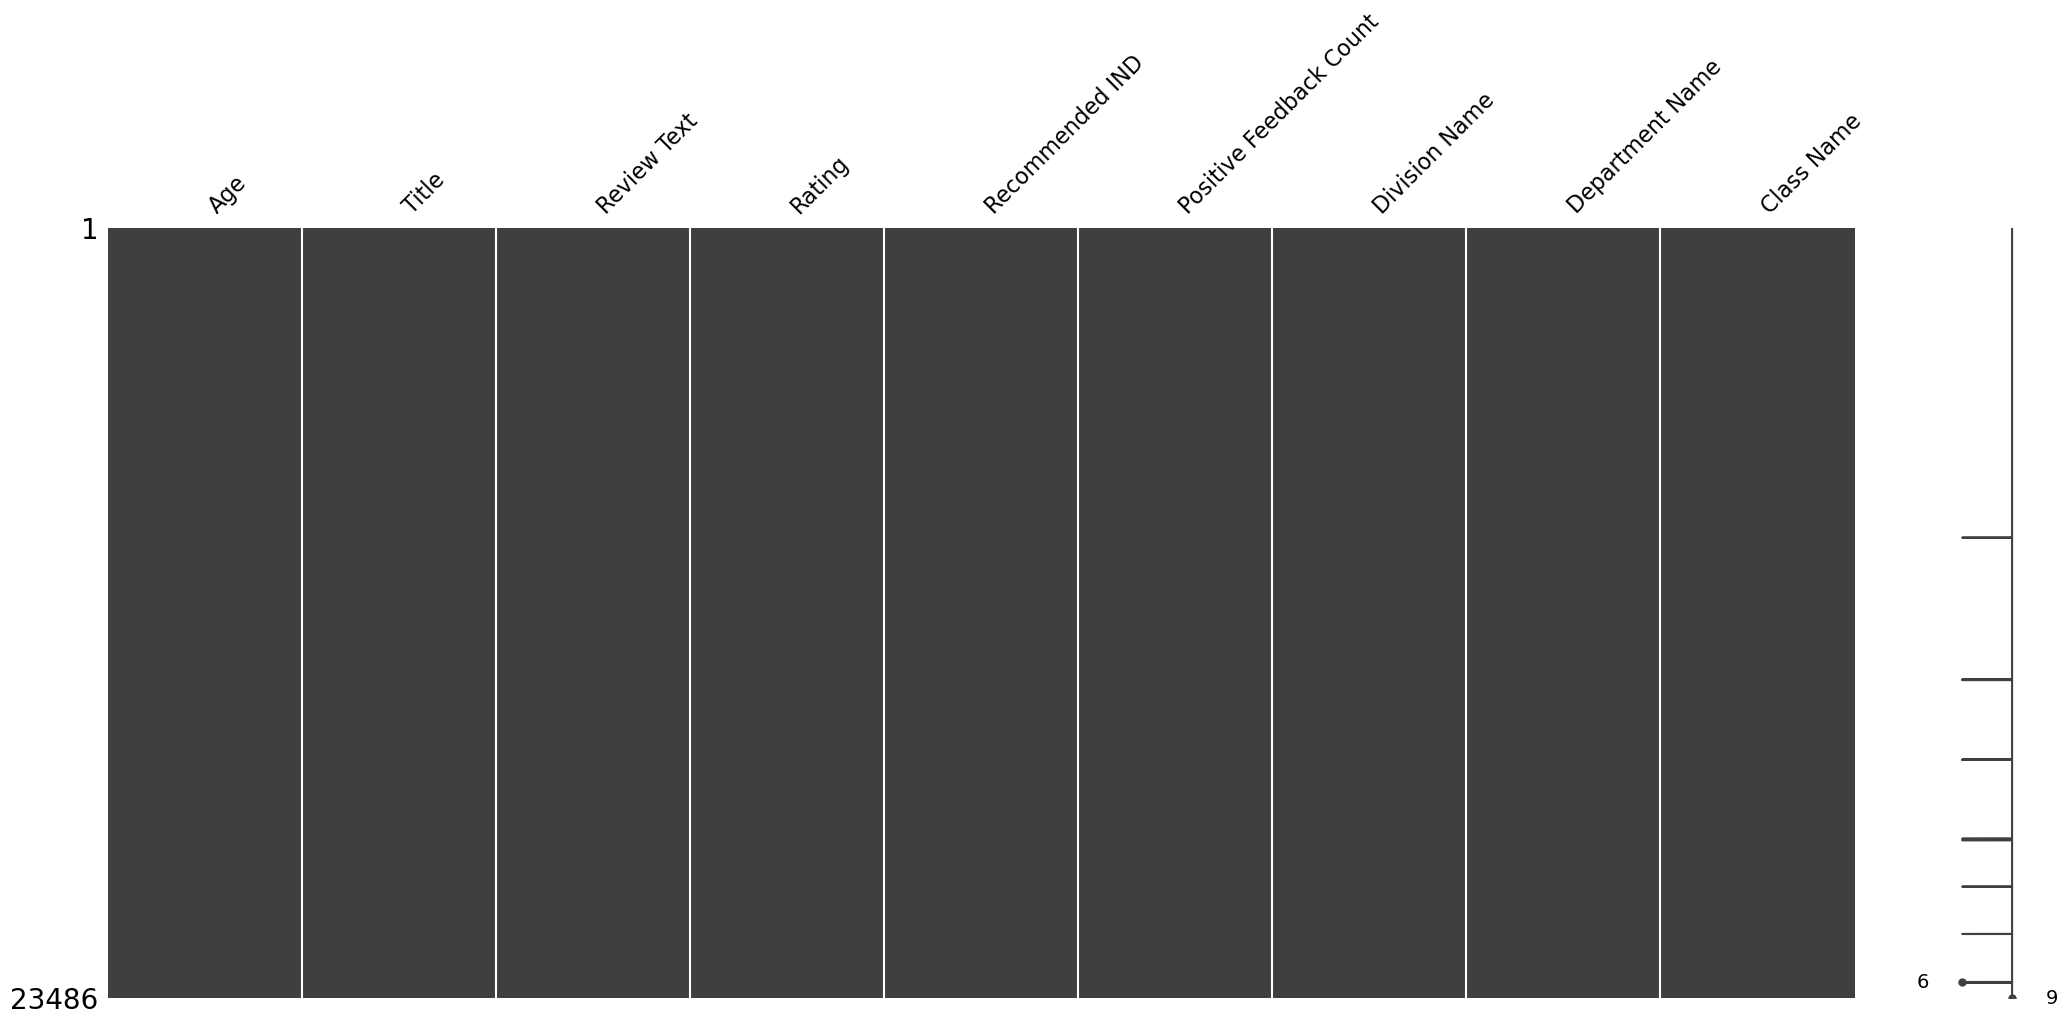

In [42]:
msno.matrix(train_df)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Title                    23486 non-null  object
 2   Review Text              23486 non-null  object
 3   Rating                   23486 non-null  int64 
 4   Recommended IND          23486 non-null  int64 
 5   Positive Feedback Count  23486 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               23472 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


In [45]:
def create_sentiment(rating):
    if rating < 3:
        return -1
    elif rating > 3:
        return 1
    else:
        return 0

In [47]:
train_df["Sentiment"] = train_df["Rating"].apply(create_sentiment)

In [48]:
train_df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


In [49]:
from sklearn.feature_extraction.text import re


def clean_data(review):
    # remove all non alphanumeric and non whitespace characters
    no_punc = re.sub(r"[^\w\s]", "", str(review))
    # remove all digits from string
    no_digits = "".join([i for i in no_punc if not i.isdigit()])
    return no_digits

In [51]:
train_df['Review Text'] = train_df['Review Text'].apply(clean_data)

In [56]:
train_df['Review Text'][5]

'I love tracy reese dresses but this one is not for the very petite i am just under  feet tall and usually wear a p in this brand this dress was very pretty out of the package but its a lot of dress the skirt is long and very full so it overwhelmed my small frame not a stranger to alterations shortening and narrowing the skirt would take away from the embellishment of the garment i love the color and the idea of the style but it just did not work on me i returned this dress'

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf = TfidfVectorizer(stop_words="english")

In [57]:
X = tfidf.fit_transform(train_df['Review Text'])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
y = train_df["Sentiment"]  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="saga")
lr.fit(X_train, y_train)  # fit the model
preds = lr.predict(X_test)  # make predictions

c:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(preds, y_test)  # 0.82

c:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

0.8215258855585831

In [62]:
def preprocess_new_data(review):
    cleaned_review = clean_data(review)
    return cleaned_review

new_reviews = [
    "This dress is amazing!",
    "I didn't like the quality of this product.",
    "I would not recommend this product to anyone.",
    "Absolutely love it!"
    "This is the best product I have ever purchased!",
    "I am extremely disappointed with this product.",
    "The quality of this product is top-notch.",
    "I regret buying this product.",
    "This product is worth every penny.",
    "I wouldn't buy this product again.",
    "I am in love with this product!",
    "This is the worst product I have ever used.",
    "I highly recommend this product to everyone.",
    "I am not satisfied with this product at all."
]

preprocessed_reviews = [preprocess_new_data(review) for review in new_reviews]
X_new = tfidf.transform(preprocessed_reviews)
new_preds = lr.predict(X_new)

for review, sentiment in zip(new_reviews, new_preds):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {'Positive' if sentiment == 1 else 'Neutral' if sentiment == 0 else 'Negative'}")
    print()

Review: This dress is amazing!
Predicted Sentiment: Positive

Review: I didn't like the quality of this product.
Predicted Sentiment: Neutral

Review: I would not recommend this product to anyone.
Predicted Sentiment: Positive

Review: Absolutely love it!This is the best product I have ever purchased!
Predicted Sentiment: Positive

Review: I am extremely disappointed with this product.
Predicted Sentiment: Negative

Review: The quality of this product is top-notch.
Predicted Sentiment: Positive

Review: I regret buying this product.
Predicted Sentiment: Positive

Review: This product is worth every penny.
Predicted Sentiment: Positive

Review: I wouldn't buy this product again.
Predicted Sentiment: Negative

Review: I am in love with this product!
Predicted Sentiment: Positive

Review: This is the worst product I have ever used.
Predicted Sentiment: Negative

Review: I highly recommend this product to everyone.
Predicted Sentiment: Positive

Review: I am not satisfied with this product

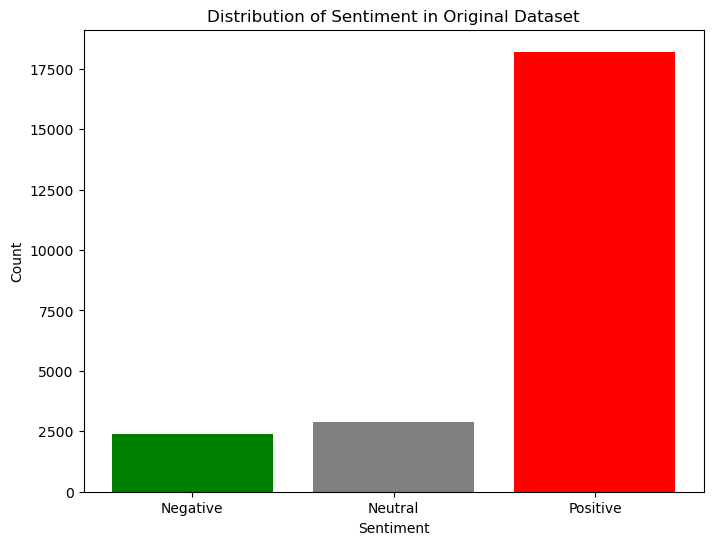

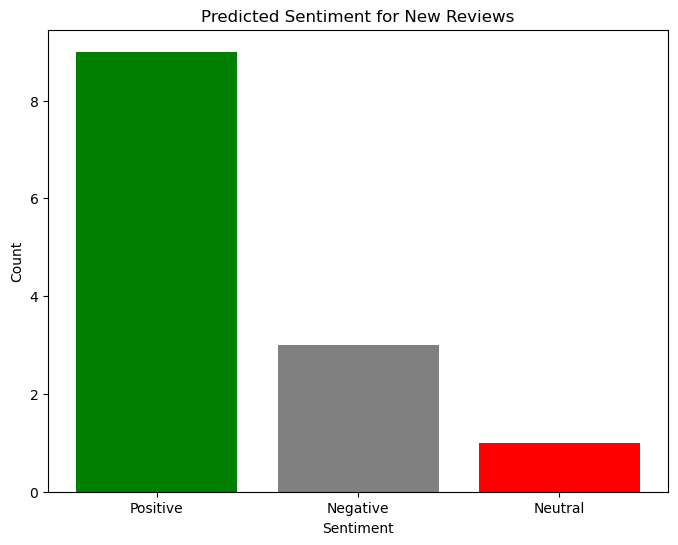

In [63]:
import matplotlib.pyplot as plt

# Distribution of sentiment in the original dataset
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'grey', 'green'])
plt.title('Distribution of Sentiment in Original Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.show()

# Predicted sentiment for new reviews
predicted_sentiments = ['Positive' if sentiment == 1 else 'Neutral' if sentiment == 0 else 'Negative' for sentiment in new_preds]
sentiment_counts_new = pd.Series(predicted_sentiments).value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts_new.index, sentiment_counts_new.values, color=['green', 'grey', 'red'])
plt.title('Predicted Sentiment for New Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
